In [ ]:
!pip install streamlit
!pip install pyngrok
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 76.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import pickle
import matplotlib.pyplot as plt

# Data Knowladge

In [ ]:
df = pd.read_csv(
    'mbti_1.csv',
    sep=',',
    encoding='utf-8',
    engine='python',
    on_bad_lines='skip'
)

print(df.info())

print(df.head())
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB
None
   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB
None
   type                                             

In [ ]:
df.columns

Index(['type', 'posts'], dtype='object')

In [ ]:
df.columns = df.columns.str.strip().str.lower()
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
df

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


In [ ]:
df['type'] = df['type'].astype('category')
df['posts'] = df['posts'].astype('string')

print(df['type'].head)
print(df['posts'].head)

<bound method NDFrame.head of 0       INFJ
1       ENTP
2       INTP
3       INTJ
4       ENTJ
        ... 
8670    ISFP
8671    ENFP
8672    INTP
8673    INFP
8674    INFP
Name: type, Length: 8675, dtype: category
Categories (16, object): ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', ..., 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']>
<bound method NDFrame.head of 0       'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1       'I'm finding the lack of me in these posts ver...
2       'Good one  _____   https://www.youtube.com/wat...
3       'Dear INTP,   I enjoyed our conversation the o...
4       'You're fired.|||That's another silly misconce...
                              ...                        
8670    'https://www.youtube.com/watch?v=t8edHB_h908||...
8671    'So...if this thread already exists someplace ...
8672    'So many questions when i do these things.  I ...
8673    'I am very conflicted right now when it comes ...
8674    'It has been too long since I have been on per...
Name: posts, Length: 

In [ ]:
df

,type,posts
0,INFJ,' and intj moments sportscenter not top ten pl...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,"'Good one course, to which I say I know that's..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the oth..."
4,ENTJ,'You're fired. That's another silly misconcept...
...,...,...
8670,ISFP,' just because I always think of cats as Fi do...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I w...
8673,INFP,'I am very conflicted right now when it comes ...


No charts were generated by quickchart


In [ ]:
#hapus duplikat
df = df.drop_duplicates(keep='last')

In [ ]:
df.isnull().sum () * 100 / len (df)

,0
type,0.0
posts,0.0


# EDA
Exploratory Data Analysis

In [ ]:
df['type'].unique()

['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', ..., 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
Length: 16
Categories (16, object): ['ENFJ', 'ENFP', 'ENTJ', 'ENTP', ..., 'ISFJ', 'ISFP', 'ISTJ', 'ISTP']

In [ ]:
df['posts'].str.len().describe()


,posts
count,8675.000000
mean,6870.446686
std,1707.105026
min,11.000000
25%,5895.500000
50%,7177.000000
75%,8132.500000
max,9948.000000


# Pre-Processing

In [ ]:
import re

def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text)

def remove_emoji(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002500-\U00002BEF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"
        u"\u3030"
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

def clean_symbols(text):
    return re.sub(r"[^a-zA-Z0-9.,!?'\s]", ' ', text)

def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text).strip()

def clean_text(text):
    text = str(text)
    text = remove_urls(text)
    text = remove_emoji(text)
    text = clean_symbols(text)
    text = remove_extra_spaces(text)
    return text

df['posts'] = df['posts'].astype('string').apply(clean_text)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    stop_words='english'
)


In [ ]:
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['posts'], df['type'], test_size=0.2, random_state=42
)

In [ ]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)

## Avoid Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)


# Modeling

## Naive Bayes

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

nb_pred = nb_model.predict(X_test_tfidf)
nb_acc = accuracy_score(y_test, nb_pred)

print("=== NAIVE BAYES ===")
print("Accuracy:", nb_acc)
print(classification_report(y_test, nb_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, nb_pred))


=== NAIVE BAYES ===
Accuracy: 0.37694524495677234
              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        41
        ENFP       0.80      0.03      0.06       125
        ENTJ       0.00      0.00      0.00        44
        ENTP       0.50      0.02      0.04       135
        ESFJ       0.00      0.00      0.00         7
        ESFP       0.00      0.00      0.00         8
        ESTJ       0.00      0.00      0.00         7
        ESTP       0.00      0.00      0.00        15
        INFJ       0.34      0.40      0.37       288
        INFP       0.32      0.89      0.47       370
        INTJ       0.62      0.26      0.37       193
        INTP       0.56      0.52      0.54       293
        ISFJ       0.00      0.00      0.00        45
        ISFP       0.00      0.00      0.00        53
        ISTJ       0.00      0.00      0.00        44
        ISTP       0.00      0.00      0.00        67

    accuracy                  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


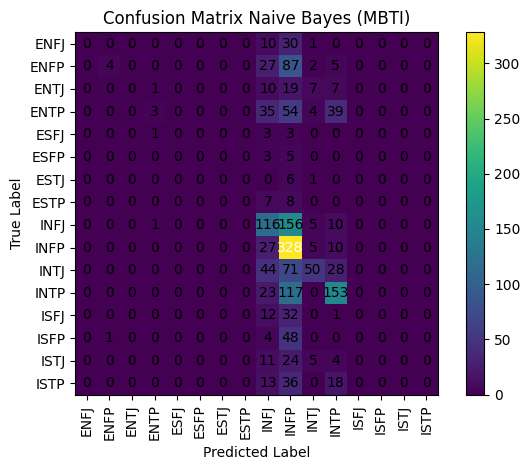

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, nb_pred)
labels = np.unique(y_test)

plt.figure()
plt.imshow(cm)
plt.xticks(range(len(labels)), labels, rotation=90)
plt.yticks(range(len(labels)), labels)
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i, format(cm[i, j], 'd'),
            ha="center",
            va="center",
            color="white" if cm[i, j] > thresh else "black"
        )
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Naive Bayes (MBTI)")
plt.colorbar()
plt.tight_layout()
plt.show()


# SVM

In [ ]:
from sklearn import svm

svm_model = svm.LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

svm_pred = svm_model.predict(X_test_tfidf)
svm_acc = accuracy_score(y_test, svm_pred)

print("\n=== SVM ===")
print("Accuracy:", svm_acc)
print(classification_report(y_test, svm_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_pred))



=== SVM ===
Accuracy: 0.6512968299711815
              precision    recall  f1-score   support

        ENFJ       0.60      0.29      0.39        41
        ENFP       0.59      0.62      0.60       125
        ENTJ       0.59      0.50      0.54        44
        ENTP       0.67      0.61      0.64       135
        ESFJ       0.50      0.14      0.22         7
        ESFP       0.00      0.00      0.00         8
        ESTJ       1.00      0.43      0.60         7
        ESTP       0.83      0.33      0.48        15
        INFJ       0.63      0.64      0.63       288
        INFP       0.67      0.77      0.72       370
        INTJ       0.58      0.68      0.63       193
        INTP       0.69      0.77      0.73       293
        ISFJ       0.88      0.49      0.63        45
        ISFP       0.62      0.45      0.52        53
        ISTJ       0.75      0.41      0.53        44
        ISTP       0.67      0.58      0.62        67

    accuracy                          

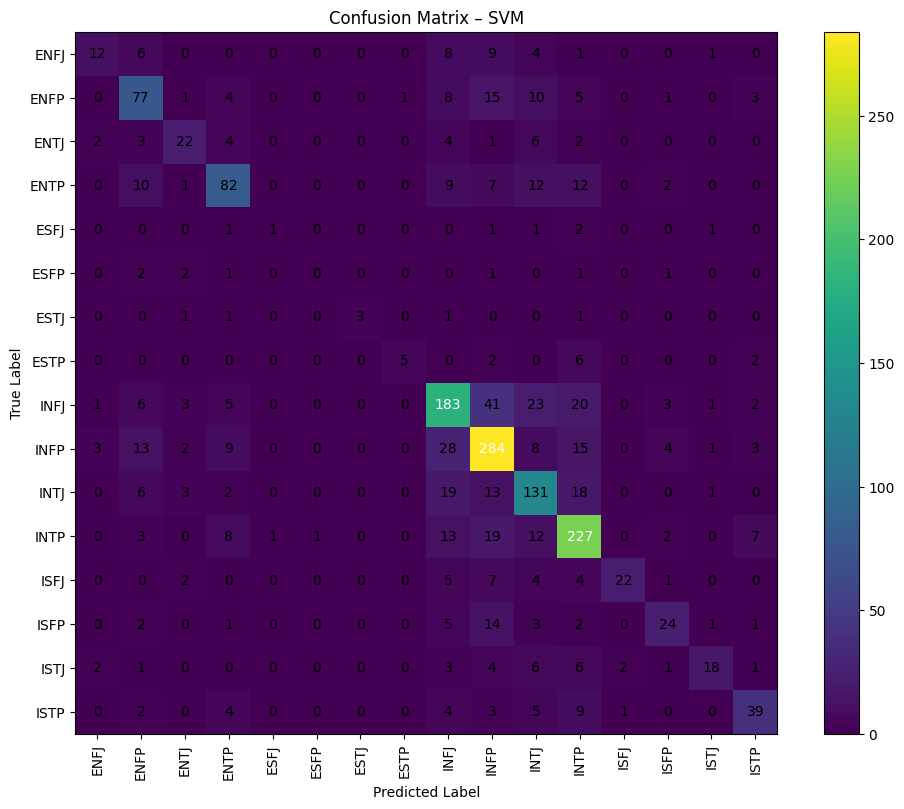

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, svm_pred)
labels = np.unique(y_test)

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix – SVM")
plt.colorbar()

tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=90)
plt.yticks(tick_marks, labels)

thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i, format(cm[i, j], 'd'),
            ha="center",
            va="center",
            color="white" if cm[i, j] > thresh else "black"
        )

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# Compare

In [ ]:
print("\n====== PERBANDINGAN ======")
print(f"Naive Bayes Accuracy : {nb_acc}")
print(f"SVM Accuracy         : {svm_acc}")


====== PERBANDINGAN ======
Naive Bayes Accuracy : 0.37694524495677234
SVM Accuracy         : 0.6512968299711815


# Evaluasi Model

In [ ]:
import joblib
#Naive Bayes
joblib.dump(nb_model, 'nb_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
#SVM
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

# Deploy
## Streamlit

In [ ]:
!pip install streamlit pyngrok -q

In [ ]:
from pyngrok import ngrok

ngrok.set_auth_token("36Pu4axz7mXFaPr1R5678MEICmR_6bx9JLvwJExBFLQP4Mfaj")


In [ ]:
%%writefile app.py
import streamlit as st
import joblib

# LOAD MODEL & TF-IDF
model = joblib.load('svm_model.pkl')
tfidf = joblib.load('tfidf_vectorizer.pkl')

# SETTING HALAMAN
st.set_page_config(page_title="MBTI Predictor", page_icon="🧠")

st.title("🧠 MBTI Personality Predictor")
st.write("Prediksi tipe kepribadian MBTI menggunakan **SVM + TF-IDF**")

# INPUT TEKS
user_input = st.text_area(
    "Masukkan teks Bahasa Inggris:",
    placeholder="Example: I enjoy being alone and thinking deeply..."
)

# TOMBOL PREDIKSI
if st.button("Prediksi MBTI"):
    if user_input.strip() == "":
        st.warning("⚠️ Teks tidak boleh kosong!")
    else:
        input_tfidf = tfidf.transform([user_input])
        prediction = model.predict(input_tfidf)
        st.success(f"✅ Prediksi Tipe MBTI: **{prediction[0]}**")


Writing app.py


In [ ]:
!kill $(lsof -t -i:8501)


kill: usage: kill [-s sigspec | -n signum | -sigspec] pid | jobspec ... or kill -l [sigspec]


In [ ]:
!streamlit run app.py &>/content/logs.txt &

from pyngrok import ngrok
public_url = ngrok.connect(8501)
print("Your Streamlit app is live at:", public_url.public_url)


Your Streamlit app is live at: https://edison-xanthic-eddie.ngrok-free.dev
